# import + set paths

In [1]:
from Utilities.across_sessions_functions import *


#Set paths 
Animal_ID = ['EJT100']

InputPath = (r'D:\Behavioural_data_output\\')

OutputPath = (r'D:\Behavioural_data_output\\')

# Plot color bars for training levels (this looks good but slows down anaysis by a lot)
HighQuality = True

# main analysis loop

Processing data for: EJT100
Finished: 1/43
Finished: 2/43
Finished: 3/43
Finished: 4/43
Finished: 5/43
Finished: 6/43
Finished: 7/43
Finished: 8/43
Finished: 9/43
Finished: 10/43
Finished: 11/43
Finished: 12/43
Finished: 13/43
Finished: 14/43
Finished: 15/43
Finished: 16/43
Finished: 17/43
Finished: 18/43
Finished: 19/43
Finished: 20/43
Finished: 21/43
Finished: 22/43
Finished: 23/43
Finished: 24/43
Finished: 25/43
Finished: 26/43
Finished: 27/43
Finished: 28/43
Finished: 29/43
Finished: 30/43
Finished: 31/43
Finished: 32/43
Finished: 33/43
Finished: 34/43
Finished: 35/43
Finished: 36/43
Finished: 37/43
Finished: 38/43
Finished: 39/43
Finished: 40/43
Finished: 41/43
Finished: 42/43
Finished: 43/43
Plotting...


KeyboardInterrupt: 

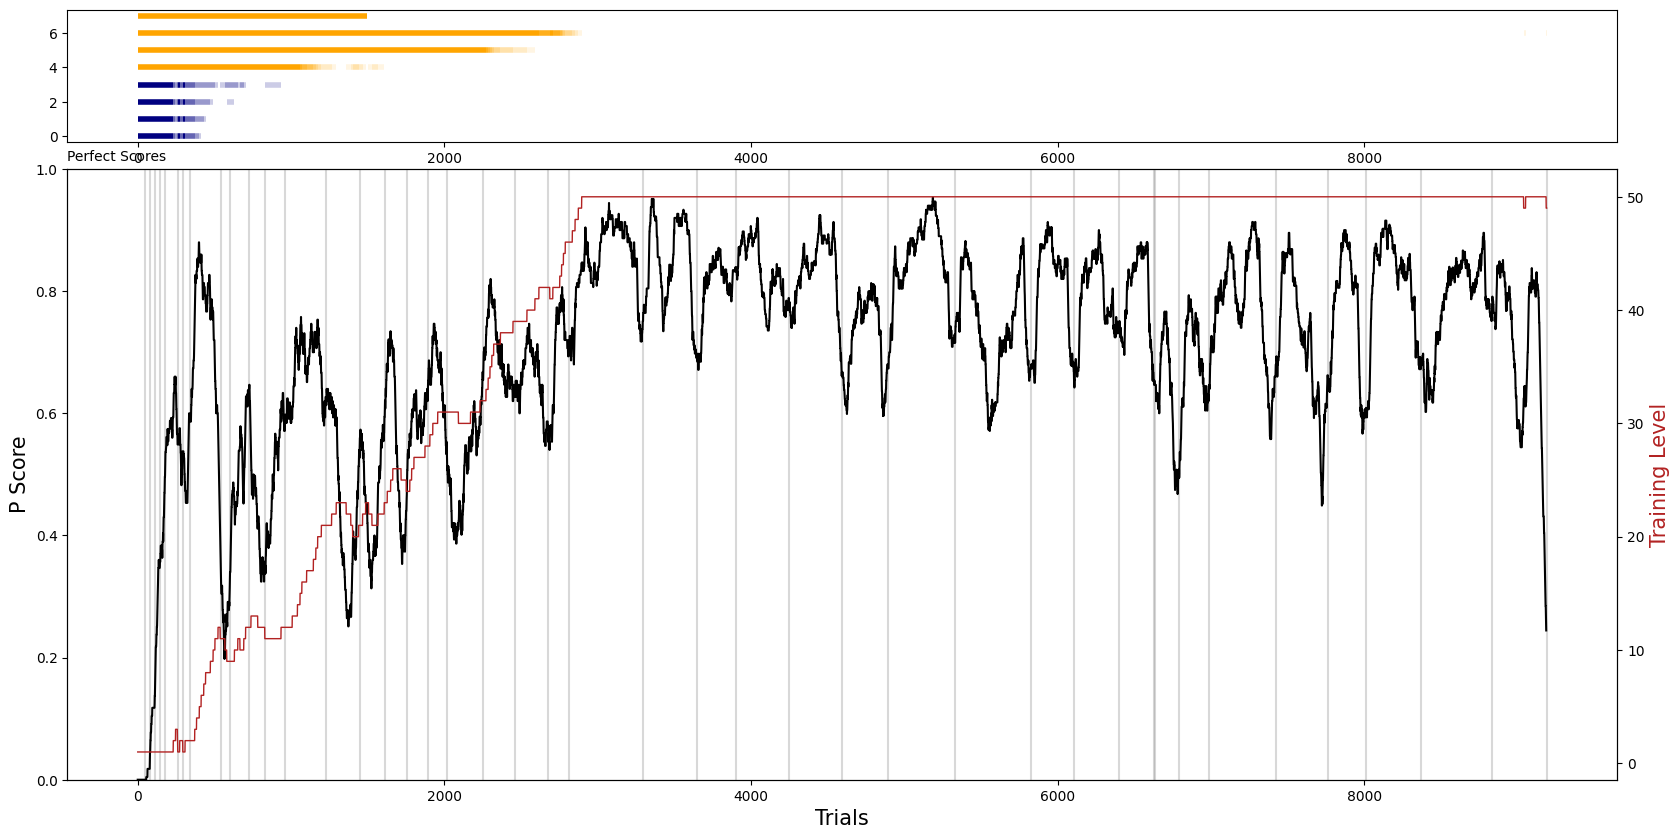

In [4]:
#### MAIN ####
for Animal_index, CurrentAnimal in enumerate(Animal_ID):
    
    display(HTML(f"<b>Processing data for: {CurrentAnimal}</b>"))
    print ('Processing data for: ' + CurrentAnimal)
    
    ## set up across Sessions data variables:
    
    #perfect plot data:
    all_sessions_perfect_scores = []
    all_sessions_t_levels = []
    all_sessions_LED_intensities = []
    all_sessions_Reward_amounts = []

    ##Transition plot data:
    transition_scores_list =[[],[],[],[]]
    transition_LEDi_list = [[],[],[],[]]
    transition_Rval_list = [[],[],[],[]]
    transitions_persession = [[],[],[],[]]
    
    ## poke numbers and latency data:
    AcrossSessionstransitions = [[],[],[],[]]
    PokesPerSession = []
    TrialsPerSession = []
    
    ##transiton scores:
    all_sessions_transition_scores = []
    all_sessions_transitionRepeat_scores = []
    
    # latency data
    all_sessions_latency_data_outin = []
    all_sessions_latency_data_inin = []
    counter = -1 # this counter keeps track of trial numbers when concatinating data later on 
    
    # stuff for lesion analysis script:
    all_sessions_transitions_pertrial = []
    all_sessions_pokes_pertrial = []
    
    # these are important for concainating trials later on!
    counter1 = -1
    counter2 = -1


    # Data for lesion analysis script
    lesion_analysis_data = {
        "transitions_per_trial": [],
        "pokes_per_trial": []
    }

    
    InputPathCurrent = (InputPath + CurrentAnimal)
    if os.path.isdir(InputPathCurrent):
        for progress, file in enumerate(os.listdir(InputPathCurrent+ r'\Preprocessed\\')):
            
            #load in data for given Animal and session:
            CurrentInputPath = (InputPathCurrent + r'\Preprocessed\\'+file+'\\')
            Session_data =  pd.read_csv((CurrentInputPath+'PreProcessed_SessionInfo.csv'))
            poke_data =  pd.read_csv((CurrentInputPath+'PreProcessed_RawPokeData.csv'))
            transition_data =  pd.read_csv((CurrentInputPath+'PreProcessed_TransitionData.csv'))
            timefiltseqs_data =  pd.read_csv((CurrentInputPath+'PreProcessed_Sequence_timefilteredonly_df.csv'))
            P1alignedtimefiltseqs_data =  pd.read_csv((CurrentInputPath+'PreProcessed_Sequence_df_timefiltered_port1aligned.csv'))
            P2alignedtimefiltseqs_data =  pd.read_csv((CurrentInputPath+'PreProcessed_Sequence_df_timefiltered_port2aligned.csv'))
            P3alignedtimefiltseqs_data =  pd.read_csv((CurrentInputPath+'PreProcessed_Sequence_df_timefiltered_port3aligned.csv'))
            P4alignedtimefiltseqs_data =  pd.read_csv((CurrentInputPath+'PreProcessed_Sequence_df_timefiltered_port4aligned.csv'))
            P5alignedtimefiltseqs_data =  pd.read_csv((CurrentInputPath+'PreProcessed_Sequence_df_timefiltered_port5aligned.csv'))
            
            RewardAmounts_df = pd.read_csv((CurrentInputPath+'PreProcessed_RewardAmounts.csv'))
            LED_Intensities_df = pd.read_csv((CurrentInputPath+'PreProcessed_LED_Intensities.csv'))
            
            port1 =  list(Session_data.loc[:,'Port1'])[0]    
            port2 =  list(Session_data.loc[:,'Port2'])[0]    
            port3 =  list(Session_data.loc[:,'Port3'])[0]  
            port4 =  list(Session_data.loc[:,'Port4'])[0]   
            port5 =  list(Session_data.loc[:,'Port5'])[0]   

            ################# perfect plot data:
        
            #split data by trials 
            trial_split_data = dict(tuple(transition_data.groupby('Trial_id')))

            # pull out transitions and timefilter data for each trial:
            transitions = []
            Tfilters= [[],[]]
            latencies = [[],[]]
            for i in trial_split_data:
                transitions = transitions + [list(trial_split_data[i].loc[:,'Transition_type'])]
                Tfilters[0] = Tfilters[0] + [list(trial_split_data[i].loc[:,'2s_Time_Filter_out_in'])]
                latencies[0] = latencies[0] +[list(trial_split_data[i].loc[:,'out_in_Latency'])]   
                # in in
                Tfilters[1] = Tfilters[1] + [list(trial_split_data[i].loc[:,'2s_Time_Filter_in_in'])]
                latencies[1] = latencies[1] +[list(trial_split_data[i].loc[:,'in_in_Latency'])]    

            # for each trial,remove transntions that were too long and split into reaminign time relevant fragments - but for both latency types, hence the loop
            timesplitseqs = [[],[]]
            for i in range(2):
                Tfilt = Tfilters[i] # use out to in pokes first then in in .
                for trial_index,time_filter in enumerate(Tfilt):
                    start_end_inds = list(np.where(np.array(time_filter)[:-1] != np.array(time_filter)[1:])[0])
                    split = parts(transitions[trial_index],list(np.array(start_end_inds)+1))
                    split2 = parts(Tfilt[trial_index],list(np.array(start_end_inds)+1))
                    TfiltSplit = RemoveSlowSequences(split,split2)
                    del split[::2] # remove every 2nd item eg. all the transitions that were timefilter = 0 so were too long. 
                    timesplitseqs[i] = timesplitseqs[i] + [TfiltSplit]
                
            ## do the exact same for latency - but for both latency types, hence the loop:
            timesplitlatencies = [[],[]]
            for i in range(2):
                Tfilt = Tfilters[i] 
                latency = latencies[i]
                for trial_index,time_filter in enumerate(Tfilt):
                    start_end_inds = list(np.where(np.array(time_filter)[:-1] != np.array(time_filter)[1:])[0])
                    split = parts(latency[trial_index],list(np.array(start_end_inds)+1))
                    split2 = parts(Tfilt[trial_index],list(np.array(start_end_inds)+1))
                    TfiltSplit = RemoveSlowSequences(split,split2)
                    del split[::2] # remove every 2nd item eg. all the latencies that were timefilter = 0 so were too long. 
                    timesplitlatencies[i] = timesplitlatencies[i] + [TfiltSplit]
                

            # for fragments in each trial,sort and trim so that seqs start at initiation port poke and then remove fragments that are too short. ie. remove any transitions sequences that dont inlcude the first port or are just a single transition.
            processed_seqs,processed_latencies = aligntofirstpokeandremovesingletransits(timesplitseqs[0],timesplitlatencies[0])  ## use  timesplitlatencies[0] for Out to in Transition times 
            
            ## generate processed transition times dataframe:
            Processesed_Transition_Latencies_df,counter1 = generate_processed_transitiontimesdataframe(processed_seqs,processed_latencies,counter1)
            
            ## determine perfect sequences and correspondng training level and shaping parameters
            trial_perfects = []
            T_CorrectScores = [[],[],[],[]]
            T_RepeatScores = [[],[],[],[]]

            for trial_index,fragments in enumerate(processed_seqs):
                perfect = []
                for fragment in fragments:
                    if sequence_contains_sequence(fragment,[21, 16, 63, 37]):
                        perfect = perfect + [1]
                    else:
                        perfect = perfect + [0]

                trial_perfects = trial_perfects + [perfect]    
                
                
                # transition scores:
                ports = [port1,port2,port3,port4,port5]
                for i in range(0,4):
                    T_CorrectScores[i] = T_CorrectScores[i] + [determine_transition_score(fragments,ports[i],ports[i+1])]
                    
                    
            # for lesion analsis script:
            transit_trials = np.array(transition_data['Trial_id'])
            out_in_transit_latencies = np.array(transition_data['out_in_Latency'])
#             in_in_transit_latencies = np.array(transition_data['in_in_Latency'])
            transitions_pertrial = transit_trials[np.where(out_in_transit_latencies<2)]
            pokes_pertrial = np.array(poke_data['Trial_id'])

            npokes_pertrial = []
            for i in range(1,pokes_pertrial[-1]+1):
                npokes_pertrial = npokes_pertrial + [len(np.where(pokes_pertrial == i)[0])]

            ntransitions_pertrial = []
            for i in range(1,transitions_pertrial[-1]+1):
                ntransitions_pertrial = ntransitions_pertrial + [len(np.where(transitions_pertrial == i)[0])]

            all_sessions_transitions_pertrial = all_sessions_transitions_pertrial +ntransitions_pertrial
            all_sessions_pokes_pertrial = all_sessions_pokes_pertrial + npokes_pertrial
            ## across sessions:
                            
            with open (CurrentInputPath+'Preprocessed_TrainingLevels' , 'rb') as fp:
                TrainingLevels = list(pickle.load(fp))
                
            Reward_amounts = [list(RewardAmounts_df['Port1']),list(RewardAmounts_df['Port2']),list(RewardAmounts_df['Port3']),list(RewardAmounts_df['Port4'])]
            LED_intensities = [list(LED_Intensities_df['Port2']),list(LED_Intensities_df['Port3']),list(LED_Intensities_df['Port4']),list(LED_Intensities_df['Port5'])]

            all_sessions_perfect_scores = all_sessions_perfect_scores + [trial_perfects]
            all_sessions_t_levels = all_sessions_t_levels + [TrainingLevels]
            all_sessions_LED_intensities = all_sessions_LED_intensities + [LED_intensities]
            all_sessions_Reward_amounts = all_sessions_Reward_amounts + [Reward_amounts]  
            all_sessions_transition_scores = all_sessions_transition_scores + [T_CorrectScores]
            all_sessions_transitionRepeat_scores = all_sessions_transitionRepeat_scores + [T_RepeatScores]  
            all_sessions_latency_data_outin = all_sessions_latency_data_outin + [Processesed_Transition_Latencies_df]
            
            ### ININ - process data again but with in to in trasnit times to get the latencies dataframe for this type:
            processed_seqs_inin,processed_latencies_inin = aligntofirstpokeandremovesingletransits(timesplitseqs[1],timesplitlatencies[1]) # the [1] indicates that these are the variables calculated from in in transition times  
            Processesed_Transition_Latencies_df_inin,counter2 = generate_processed_transitiontimesdataframe(processed_seqs_inin,processed_latencies_inin,counter2)
            all_sessions_latency_data_inin = all_sessions_latency_data_inin + [Processesed_Transition_Latencies_df_inin]
            
            #print progress update
            print('Finished: ' + str(progress+1) + '/' + str(len(os.listdir(InputPathCurrent+ '\\Preprocessed\\'))))
                
    print('Plotting...')

    ## remove old version of output dir 
    if os.path.isdir(InputPathCurrent + r'\\AcrossSessions\\'):
        shutil.rmtree(InputPathCurrent + r'\\AcrossSessions\\',ignore_errors=True)

#######################################################################################################################################################################################################################################################################################################################################
    ## perfect sequences plot:
    # for each trial, sequences of pokes that are temporaly relevant are extracted and split into seprate sequences, these sequences are then ignored ifg they dont contain an initiation poke, if they do, everyhing before this is ignored. 
    # You are then left with a few sequence fragments that start with an initiation poke. some trials will have several some trials will have 1 of these frgaments. look for perfect sequences in these fragments and find mean or each trial (1 perfect seqience = score of 1, 1 perfect , 1 wrong = score of 0.5 etc.)
    # no fragments or no  perfect seq = score of 0. Then convolve across these P scores to plot:
#######################################################################################################################################################################################################################################################################################################################################

    # reconfigure data for plotting:

    trials_per_session= []
    for i in range(len(all_sessions_t_levels)):
        trials_per_session = trials_per_session + [len(all_sessions_t_levels[i])]
    cum_trials_per_session = np.cumsum(trials_per_session)

    TrainLevelsAll = sum(all_sessions_t_levels, [])

    LED_intensitiesAll = [[],[],[],[]]
    for ind in range(0,4):
        for i in range(len(all_sessions_LED_intensities)):
            LED_intensitiesAll[ind] = LED_intensitiesAll[ind] + all_sessions_LED_intensities[i][ind]
                                                                
    RewardValsAll = [[],[],[],[]]
    for ind in range(0,4):
        for i in range(len(all_sessions_Reward_amounts)):
            RewardValsAll[ind] = RewardValsAll[ind] + all_sessions_Reward_amounts[i][ind]

    perfectscore_trials = []
    for i in range(len(all_sessions_perfect_scores)):
        for trial in all_sessions_perfect_scores[i]:
            if len(trial) == 0:
                perfectscore_trials = perfectscore_trials + [0]
            else:
                perfectscore_trials = perfectscore_trials + [np.mean(trial)]

    # plot:
    fig = plt.figure(figsize=(20, 10))
    ax = plt.subplot2grid((5, 3), (1, 0), rowspan =5,colspan =3)   
    
    ax.set_ylim([0, 1])

    ax.plot(convolve_movmean(perfectscore_trials,75),color = 'black',linewidth = 1.5,zorder=11)


    ax.set_title('Perfect Scores', loc = 'left', size = 10, color = 'black')
    ax.set_xlabel('Trials', fontsize = 15)
    ax.set_ylabel('P Score',fontsize = 15, color = 'black')

    ax_2=ax.twinx()
    ax_2.plot(TrainLevelsAll,linewidth = 1,color = 'firebrick')
    ax_2.set_ylabel('Training Level',fontsize = 15, color = 'firebrick')
    
    for n_trials in cum_trials_per_session:
        ax.vlines(n_trials, 0, 1, color = 'grey',alpha = 0.3,zorder=10) 


     ## plot color gradients for reward and light guidance:

    if HighQuality == True:
        ax2 =  plt.subplot2grid((5, 3), (0, 0), rowspan =1,colspan =3)
        c1 = 'orange'
        c2 = 'navy'
        c3 = 'white'
        
        for i in range(0,4):
            for ind, value in enumerate(LED_intensitiesAll[i]):
                if ind == 0:
                    prev = 0
                else:
                    prev = ind-1

                normalised_value = value/90
                if not normalised_value == 0:
                    ax2.hlines(i+4, prev, ind, color=colorFader(c3,c1,normalised_value), linewidth=4)

                # plot an invisible point at the end to keep axis scaling the same
                if ind == len(LED_intensitiesAll[i]) - 1:
                    ax2.plot(ind,0,'.',color = 'white')

                normalised_Rvalue = RewardValsAll[i][ind]/5 # 5 = max r val
                if not normalised_Rvalue == 0:
                    ax2.hlines(i, prev, ind, color=colorFader(c3,c2,normalised_Rvalue), linewidth=4)

        ax2.set_frame_on(False)  

        labels=['Port 1 water','Port 2 water','Port 3 water','Port 4 water','Port 2 LED','Port 3 LED','Port 4 LED','Port 5 LED']
        ax2.set_yticks((0,1,2,3,4,5,6,7))
        ax2.set_yticklabels(labels)

        ax2.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False) 

    plt.tight_layout()   

    SaveFig_hold('PerfectScores ' + os.listdir(InputPathCurrent+ r'\\Preprocessed\\')[0] + 'to' + os.listdir(InputPathCurrent+ r'\\Preprocessed\\')[-1] + '.png',InputPathCurrent + '\\AcrossSessions\\')

    if 50 in TrainLevelsAll:
        full_task = True
        to_full_task = np.where(np.array(TrainLevelsAll) == 50)[0][0]
    else:
        full_task = False
        
        
    if full_task == True:
        if len(TrainLevelsAll)-to_full_task>1000:
            ax.set_xlim([0, to_full_task+1000])
            if HighQuality == True:
                ax2.set_xlim([0, to_full_task+1000])
            ax.set_title('Perfect Scores to level 50 + 1000 trials', size = 10, color = 'black')
            SaveFig('PerfectScoresToFinalTask_+1000trials.png',InputPathCurrent + r'\AcrossSessions\\ToFinalTask\\')
        else: 
            ax.set_xlim([0, to_full_task])
            ax.set_title('Perfect Scores to level 50', size = 10, color = 'black')
            ax2.set_xlim([0, to_full_task])
            SaveFig('PerfectScoresToFinalTask.png',InputPathCurrent + r'\AcrossSessions\\ToFinalTask\\')

    
    #Save out Perfect scores data:
    filepath = OutputPath + Animal_ID[Animal_index] + (r'\\AcrossSessions\\AnalysisOutput\\')
    if not os.path.isdir(filepath):
        os.makedirs(filepath)

    filename = 'PerfectScore_trials'
    with open(filepath + filename, 'wb') as fp:
        pickle.dump(perfectscore_trials, fp)

    if full_task == True:
        filename = 'Trials_to_Full_Task'
        with open(filepath + filename, 'wb') as fp:
            pickle.dump(to_full_task, fp)

        

#######################################################################################################################################################################################################################################################################################################################################            
##### Transition scores: 
#use same data as perfect scores but look for each transition, ignoring any transitions from irrelevant ports
#######################################################################################################################################################################################################################################################################################################################################            

    Transitionscore_trials = [[],[],[],[]]
    for x in range(len(Transitionscore_trials)):
        for i in range(len(all_sessions_transition_scores)):
            for trial in all_sessions_transition_scores[i][x]:
                if len(trial) == 0:
                    Transitionscore_trials[x] = Transitionscore_trials[x] + [0]
                else:
                    Transitionscore_trials[x] = Transitionscore_trials[x] + [np.mean(trial)]


    # # plot:

    fig = plt.figure(figsize=(20, 10))

    ax = plt.subplot2grid((5, 3), (1, 0), rowspan =5,colspan =3)   

    colors = ['Maroon','tab:red','tab:orange','tab:purple']
    # for ind, ax in enumerate(fig.axes):
    for ind in range(0,4):
        ax.set_ylim([0, 1])
        ax.plot(convolve_movmean(Transitionscore_trials[ind],75),color = colors[ind],linewidth = 1.5,zorder=11)

        ax.set_title('Subsequence transition scores', loc = 'left', size = 10, color = 'black')
        ax.set_xlabel('Trials', fontsize = 15)
        ax.set_ylabel('T Score',fontsize = 15, color = 'tab:red')

        ax2=ax.twinx()
        ax2.plot(TrainLevelsAll,linewidth = 1,color = 'k')
        ax2.set_ylabel('Training Level',fontsize = 15, color = 'k')

    Legend = []
    for i in range(0,4):
        Legend = Legend + [mpatches.Patch(color=colors[i], label=('Transition' + str(i+1)))]
    ax.legend(handles = Legend,frameon=False,fontsize = 12, loc = 'right')

    for n_trials in cum_trials_per_session:
        ax.vlines(n_trials, 0, 1, color = 'grey',alpha = 0.3,zorder=10) 


     ## plot color gradients for reward and light guidance:
    if HighQuality == True:
        ax2 =  plt.subplot2grid((5, 3), (0, 0), rowspan =1,colspan =3)
        for i in range(0,4):
            for ind, value in enumerate(LED_intensitiesAll[i]):
                if ind == 0:
                    prev = 0
                else:
                    prev = ind-1

                normalised_value = value/90
                if not normalised_value == 0:
                    ax2.hlines(i+4, prev, ind, color=colorFader(c3,c1,normalised_value), linewidth=4)

                # plot an invisible point at the end to keep axis scaling the same
                if ind == len(LED_intensitiesAll[i]) - 1:
                    ax2.plot(ind,0,'.',color = 'white')

                normalised_Rvalue = RewardValsAll[i][ind]/5 # 5 = max r val
                if not normalised_Rvalue == 0:
                    ax2.hlines(i, prev, ind, color=colorFader(c3,c2,normalised_Rvalue), linewidth=4)

        ax2.set_frame_on(False)  

        labels=['Port 1 water','Port 2 water','Port 3 water','Port 4 water','Port 2 LED','Port 3 LED','Port 4 LED','Port 5 LED']
        ax2.set_yticks((0,1,2,3,4,5,6,7))
        ax2.set_yticklabels(labels)

        ax2.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False) 

    plt.tight_layout()   


    SaveFig_hold('TransitionScores ' + os.listdir(InputPathCurrent+ r'\\Preprocessed\\')[0] + 'to' + os.listdir(InputPathCurrent+ '\\Preprocessed\\')[-1] + '.png',InputPathCurrent + '\\AcrossSessions\\')

    if full_task == True:
        if len(TrainLevelsAll)-to_full_task>1000:
            ax.set_xlim([0, to_full_task+1000])
            ax.set_title('Transition Scores to level 50 + 1000 trials', size = 10, color = 'black')
            if HighQuality == True: 
                ax2.set_xlim([0, to_full_task+1000])
            SaveFig('TransitionScoresToFinalTask_+1000trials.png',InputPathCurrent + r'\AcrossSessions\\ToFinalTask\\')
        else: 
            ax.set_xlim([0, to_full_task])
            ax.set_title('Transition Scores to level 50', size = 10, color = 'black')
            ax2.set_xlim([0, to_full_task])
            SaveFig('TransitionScoresToFinalTask.png',InputPathCurrent + r'\AcrossSessions\\ToFinalTask\\')


    #Save out transition scores data:
    filename = 'TransitionScore_trials'
    with open(filepath + filename, 'wb') as fp:
        pickle.dump(Transitionscore_trials, fp)
        
        
    #######################################################################################################################################################################################################################################################################################################################################            

        ##### Trials per session

    #######################################################################################################################################################################################################################################################################################################################################            



    fig,[ax,ax2] = plt.subplots(1, 2, figsize=(35, 10))
    ax.plot(cum_trials_per_session,'o-',color = 'firebrick')
    ax2.plot(trials_per_session,'o-', color = 'c')

    ax.set_xlabel('Sessions',fontsize = 15, color = 'k')
    ax2.set_xlabel('Sessions',fontsize = 15, color = 'k')
    ax.set_ylabel('Trials',fontsize = 15, color = 'k')
    ax2.set_ylabel('Trials',fontsize = 15, color = 'k')
    ax.set_title('Cumulative trials completed', size = 10, color = 'black',loc = 'left')
    ax2.set_title('Trials completed by session', size = 10, color = 'black',loc = 'left')
    ax.tick_params(axis="y", labelsize=9)
    ax.tick_params(axis="x", labelsize=9)

    SaveFig('TrialsPerSessions.png',InputPathCurrent + r'\\AcrossSessions\\')

    ## save out this data:

    #Save out transition scores data:
    filename = 'TrialsPerSessions'
    with open(filepath + filename, 'wb') as fp:
        pickle.dump(trials_per_session, fp)
   

    #######################################################################################################################################################################################################################################################################################################################################            

        ##### Transitions times per trial

    #######################################################################################################################################################################################################################################################################################################################################            



    ## pull out transition times and trial reference for each subseq movement:
    seq = [21,16,63,37]
    transitions = [[]]
    trials = [[]]

    for i in range (len(seq)):
        transitions[i],trials[i] = findTransitionTimes(seq[i],all_sessions_latency_data_outin)
        transitions = transitions + [[]]
        trials = trials + [[]]

    ## find the average time taken for each transition per trial (this should be just calculated across just 1 number unless the mouse did multiple transitions in 1 trial (eg. error trials))
    Mean_Transitions_bytrial, ref_trials = find_mean_transiton_times_by_trail(transitions,trials)
    
    ## Plot:

    fig = plt.figure(figsize=(20, 10))
    ax = plt.subplot2grid((5, 3), (1, 0), rowspan =5,colspan =3)

    for ind in range(4):
        ax.plot(ref_trials[ind],convolve_movmean(Mean_Transitions_bytrial[ind],100), color = colors[ind])

    ax.set_title('Transition times [Port OUT to Port IN]', loc = 'left', size = 10, color = 'black')
    ax.set_xlabel('Trials', fontsize = 15)
    ax.set_ylabel('Transition time',fontsize = 15, color = 'firebrick')

    ax_2=ax.twinx()
    ax_2.plot(TrainLevelsAll,linewidth = 1,color = 'black')
    ax_2.set_ylabel('Training Level',fontsize = 15, color = 'black')


    Legend = []
    for i in range(0,4):
        Legend = Legend + [mpatches.Patch(color=colors[i], label=('Transition' + str(i+1)))]
    ax.legend(handles = Legend,frameon=False,fontsize = 12, loc = 'right')


    ## plot color gradients for reward and light guidance:
    if HighQuality == True:
        ax2 =  plt.subplot2grid((5, 3), (0, 0), rowspan =1,colspan =3)

        for i in range(0,4):
            for ind, value in enumerate(LED_intensitiesAll[i]):
                if ind == 0:
                    prev = 0
                else:
                    prev = ind-1

                normalised_value = value/90
                if not normalised_value == 0:
                    ax2.hlines(i+4, prev, ind, color=colorFader(c3,c1,normalised_value), linewidth=4)

                # plot an invisible point at the end to keep axis scaling the same
                if ind == len(LED_intensitiesAll[i]) - 1:
                    ax2.plot(ind,0,'.',color = 'white')

                normalised_Rvalue = RewardValsAll[i][ind]/5 # 5 = max r val
                if not normalised_Rvalue == 0:
                    ax2.hlines(i, prev, ind, color=colorFader(c3,c2,normalised_Rvalue), linewidth=4)

        ax2.set_frame_on(False)  


        labels=['Port 1 water','Port 2 water','Port 3 water','Port 4 water','Port 2 LED','Port 3 LED','Port 4 LED','Port 5 LED']
        ax2.set_yticks((0,1,2,3,4,5,6,7))
        ax2.set_yticklabels(labels)

        ax2.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False) 

    plt.tight_layout()

    SaveFig_hold('Transition_times_OutIn_tofinaltask+1000_trials' + '.png',InputPathCurrent + r'\\AcrossSessions\\')

    if full_task == True:
        if len(TrainLevelsAll)-to_full_task>1000:
            ax.set_xlim([0, to_full_task+1000])
            if HighQuality == True:    
                ax2.set_xlim([0, to_full_task+1000])
            ax.set_title('Transition times to level 50 + 1000 trials', size = 10, color = 'black')
            SaveFig('TransitionTimes_OutIn_ToFinalTask_+1000trials.png',InputPathCurrent + r'\AcrossSessions\\ToFinalTask\\')
        else: 
            ax.set_xlim([0, to_full_task])
            ax2.set_xlim([0, to_full_task])
            ax.set_title('Transition times to level 50', size = 10, color = 'black')
            SaveFig('TransitionTimes_OutIn_ToFinalTask.png',InputPathCurrent + r'\AcrossSessions\\ToFinalTask\\')

            
        #Save out transition times data for OUt to in:
    filename = 'MeanTransitionTimes_bytrial_outin'
    with open(filepath + filename, 'wb') as fp:
        pickle.dump(Mean_Transitions_bytrial, fp)
        
        # tranitions times are only calculated for trials where mouse did a viable transition so to use this data you nee dot know which trials these corespond to: 
    filename = 'MeanTransitionTimes_bytrial_outin_REFERENCES'
    with open(filepath + filename, 'wb') as fp:
        pickle.dump(ref_trials, fp)
        
 #######################################################################################################################################################################################################################################################################################################################################            

        ##### Transitions times per trial
    #### same agin but but port in to port in:
#######################################################################################################################################################################################################################################################################################################################################            

    transitions = [[]]
    trials = [[]]
    for i in range (len(seq)):
        transitions[i],trials[i] = findTransitionTimes(seq[i],all_sessions_latency_data_inin)
        transitions = transitions + [[]]
        trials = trials + [[]]

    ## find the average time taken for each transition per trial (this should be just calculated across just 1 number unless the mouse did multiple transitions in 1 trial (eg. error trials))
    Mean_Transitions_bytrial, ref_trials = find_mean_transiton_times_by_trail(transitions,trials)

    ## Plot:

    fig = plt.figure(figsize=(20, 10))
    ax = plt.subplot2grid((5, 3), (1, 0), rowspan =5,colspan =3)

    for ind in range(4):
        ax.plot(ref_trials[ind],convolve_movmean(Mean_Transitions_bytrial[ind],100), color = colors[ind])

    ax.set_title('Transition times [Port IN to Port IN]', loc = 'left', size = 10, color = 'black')
    ax.set_xlabel('Trials', fontsize = 15)
    ax.set_ylabel('Transition time',fontsize = 15, color = 'firebrick')

    ax_2=ax.twinx()
    ax_2.plot(TrainLevelsAll,linewidth = 1,color = 'black')
    ax_2.set_ylabel('Training Level',fontsize = 15, color = 'black')


    Legend = []
    for i in range(0,4):
        Legend = Legend + [mpatches.Patch(color=colors[i], label=('Transition' + str(i+1)))]
    ax.legend(handles = Legend,frameon=False,fontsize = 12, loc = 'right')


    ## plot color gradients for reward and light guidance:
    if HighQuality == True:
        ax2 =  plt.subplot2grid((5, 3), (0, 0), rowspan =1,colspan =3)

        for i in range(0,4):
            for ind, value in enumerate(LED_intensitiesAll[i]):
                if ind == 0:
                    prev = 0
                else:
                    prev = ind-1

                normalised_value = value/90
                if not normalised_value == 0:
                    ax2.hlines(i+4, prev, ind, color=colorFader(c3,c1,normalised_value), linewidth=4)

                # plot an invisible point at the end to keep axis scaling the same
                if ind == len(LED_intensitiesAll[i]) - 1:
                    ax2.plot(ind,0,'.',color = 'white')

                normalised_Rvalue = RewardValsAll[i][ind]/5 # 5 = max r val
                if not normalised_Rvalue == 0:
                    ax2.hlines(i, prev, ind, color=colorFader(c3,c2,normalised_Rvalue), linewidth=4)

        ax2.set_frame_on(False)  


        labels=['Port 1 water','Port 2 water','Port 3 water','Port 4 water','Port 2 LED','Port 3 LED','Port 4 LED','Port 5 LED']
        ax2.set_yticks((0,1,2,3,4,5,6,7))
        ax2.set_yticklabels(labels)

        ax2.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False) 

    plt.tight_layout()

    SaveFig_hold('Transition_times_InIn_tofinaltask+1000_trials' + '.png',InputPathCurrent + '\\AcrossSessions\\')

    if full_task == True:
        if len(TrainLevelsAll)-to_full_task>1000:
            ax.set_xlim([0, to_full_task+1000])
            if HighQuality == True:
                ax2.set_xlim([0, to_full_task+1000])
            ax.set_title('Transition times to level 50 + 1000 trials', size = 10, color = 'black')
            SaveFig('TransitionTimes_InIn_ToFinalTask_+1000trials.png',InputPathCurrent + r'\AcrossSessions\\ToFinalTask\\')
        else: 
            ax.set_xlim([0, to_full_task])
            ax2.set_xlim([0, to_full_task])
            ax.set_title('Transition times to level 50', size = 10, color = 'black')
            SaveFig('TransitionTimes_InIn_ToFinalTask.png',InputPathCurrent + r'\AcrossSessions\\ToFinalTask\\')


#######################################################################################################################################################################################################################################################################################################################################            
#Save out all unsaved data:
#######################################################################################################################################################################################################################################################################################################################################            

    #Save out transition times data:
    filename = 'MeanTransitionTimes_bytrial_inin'
    with open(filepath + filename, 'wb') as fp:
        pickle.dump(Mean_Transitions_bytrial, fp)
        
    # tranitions times are only calculated for trials where mouse did a viable transition so to use this data you nee dot know which trials these corespond to: 
    filename = 'MeanTransitionTimes_bytrial_inin_REFERENCES'
    with open(filepath + filename, 'wb') as fp:
        pickle.dump(ref_trials, fp)
        
    #save out training level data:
    filename = 'Training_levels'
    with open(filepath + filename, 'wb') as fp:
        pickle.dump(TrainLevelsAll, fp)
        

    #save out data for lesion scripts:
    filename = 'Transitions_PerTrial'
    with open(filepath + filename, 'wb') as fp:
        pickle.dump(all_sessions_transitions_pertrial, fp)
    
    #save out data for lesion scripts:
    filename = 'pokes_PerTrial'
    with open(filepath + filename, 'wb') as fp:
        pickle.dump(all_sessions_pokes_pertrial, fp)
        
        